In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bahsis_data = pd.read_csv('veri_bahsis.csv',sep='\t')
bahsis_data

,hesap,bahsis,cinsiyet,sigara,gün,zaman,kisi_sayisi
0,16.99,1.01,Kadin,Hayir,Pazar,Aksam,2
1,10.34,1.66,Erkek,Hayir,Pazar,Aksam,3
2,21.01,3.50,Erkek,Hayir,Pazar,Aksam,3
3,23.68,3.31,Erkek,Hayir,Pazar,Aksam,2
4,24.59,3.61,Kadin,Hayir,Pazar,Aksam,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Erkek,Hayir,Cumart,Aksam,3
240,27.18,2.00,Kadin,Evet,Cumart,Aksam,2
241,22.67,2.00,Erkek,Evet,Cumart,Aksam,2
242,17.82,1.75,Erkek,Hayir,Cumart,Aksam,2


In [3]:
ucus = pd.read_csv('veri_ucus.csv')
ucus

,yil,ay,yolcu_sayisi
0,1949,ocak,112
1,1949,subat,118
2,1949,mart,132
3,1949,nisan,129
4,1949,mayis,121
...,...,...,...
139,1960,agustos,606
140,1960,eylul,508
141,1960,ekim,461
142,1960,kasim,390


In [4]:
ucus_data = ucus.pivot(index='ay',columns='yil',values='yolcu_sayisi')

ucus_data

yil,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
ay,,,,,,,,,,,,
agustos,148,170,199,242,272,293,347,405,467,505,559,606
aralik,118,140,166,194,201,229,278,306,336,337,405,432
ekim,119,133,162,191,211,229,274,306,347,359,407,461
eylul,136,158,184,209,237,259,312,355,404,404,463,508
haziran,135,149,178,218,243,264,315,374,422,435,472,535
kasim,104,114,146,172,180,203,237,271,305,310,362,390
mart,132,141,178,193,236,235,267,317,356,362,406,419
mayis,121,125,172,183,229,234,270,318,355,363,420,472
nisan,129,135,163,181,235,227,269,313,348,348,396,461


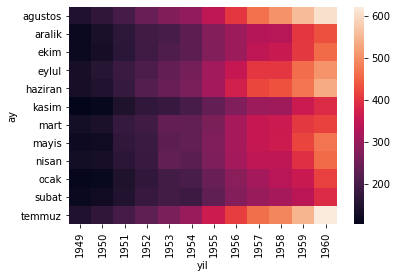

In [5]:
sns.heatmap(data=ucus_data)

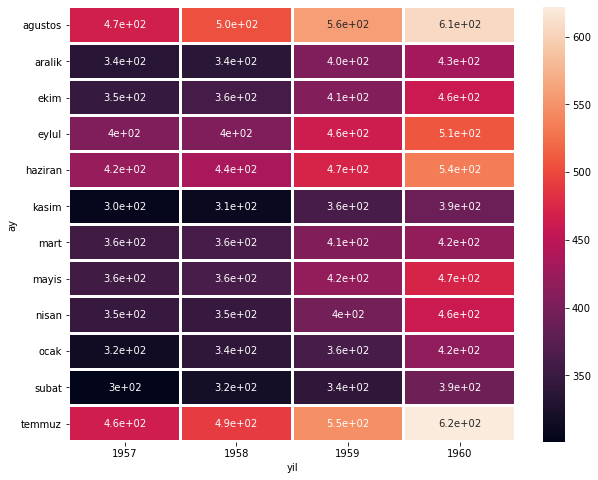

In [6]:
fig,axes = plt.subplots(figsize=(10,8))

sns.heatmap(data=ucus_data.loc[:,'1957':],annot=True,
           linecolor='white',linewidths=2,ax=axes)

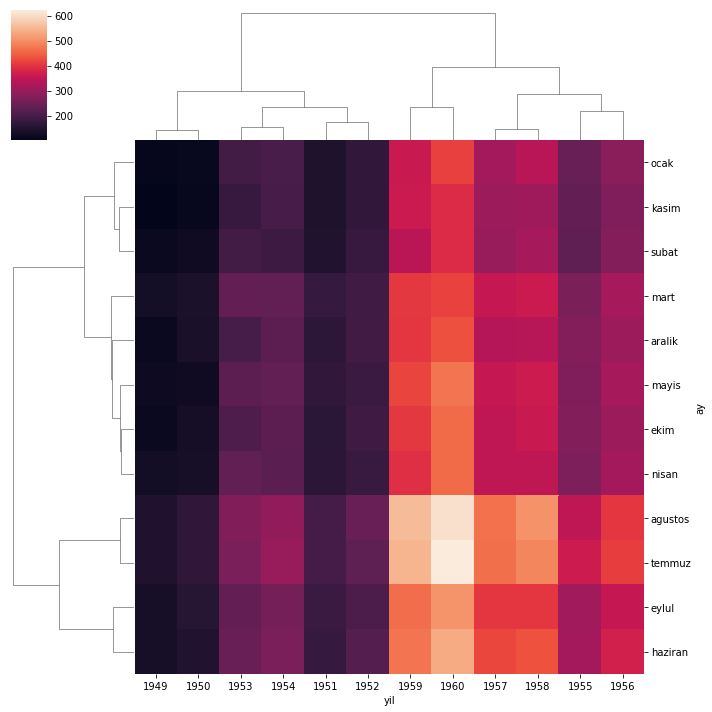

In [7]:
sns.clustermap(data=ucus_data)

In [8]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

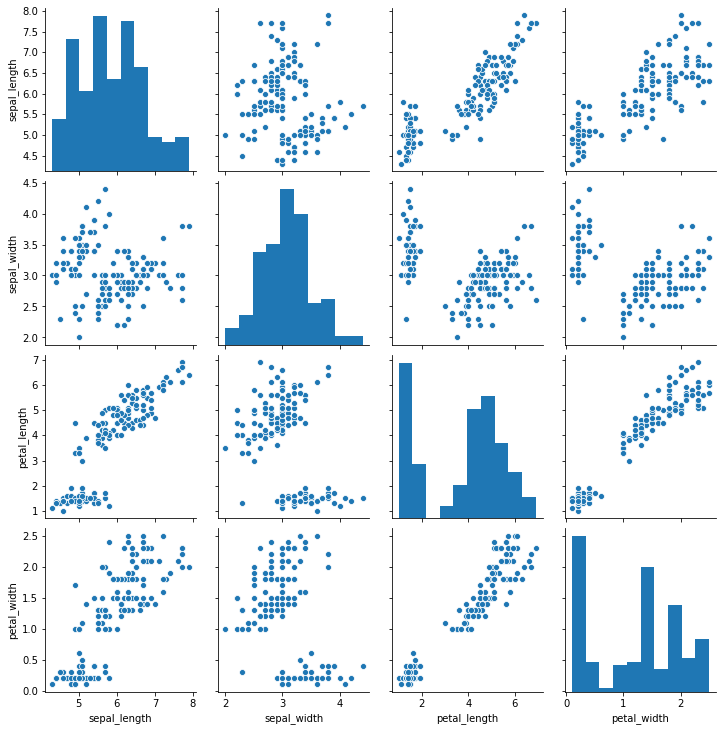

In [10]:
sns.pairplot(iris)

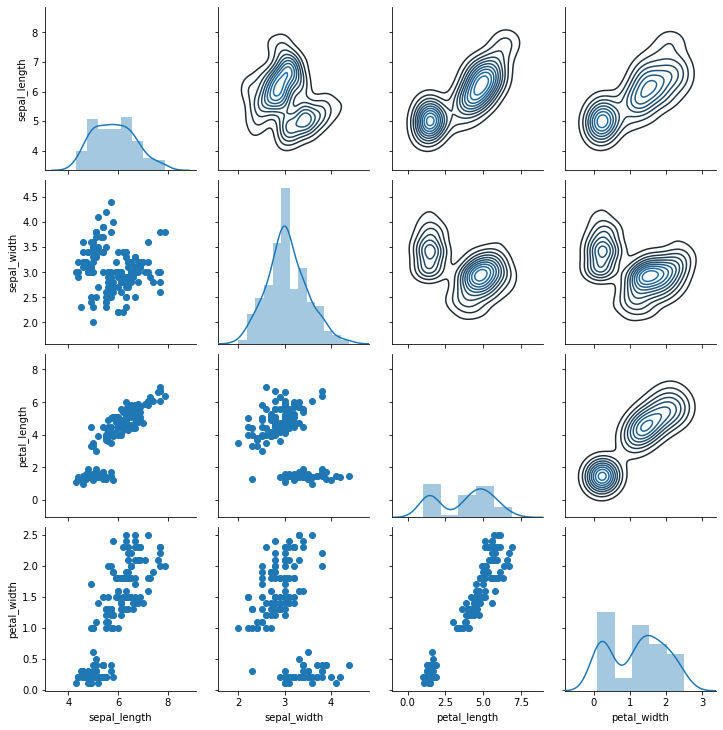

In [11]:
iris_grid = sns.PairGrid(iris)

iris_grid.map_diag(sns.distplot)
iris_grid.map_lower(plt.scatter)
iris_grid.map_upper(sns.kdeplot)

In [12]:
bahsis_data.head()

,hesap,bahsis,cinsiyet,sigara,gün,zaman,kisi_sayisi
0,16.99,1.01,Kadin,Hayir,Pazar,Aksam,2
1,10.34,1.66,Erkek,Hayir,Pazar,Aksam,3
2,21.01,3.50,Erkek,Hayir,Pazar,Aksam,3
3,23.68,3.31,Erkek,Hayir,Pazar,Aksam,2
4,24.59,3.61,Kadin,Hayir,Pazar,Aksam,4


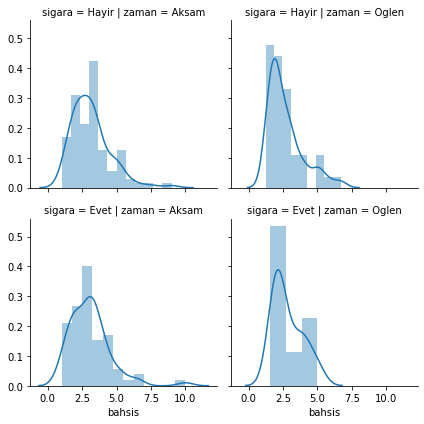

In [13]:
bahsis_facet = sns.FacetGrid(bahsis_data,row='sigara',col='zaman')

bahsis_facet.map(sns.distplot,'bahsis',kde=True)

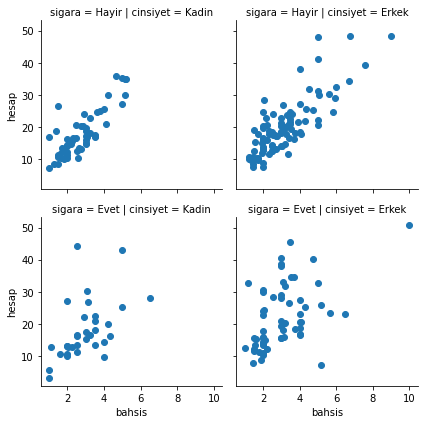

In [14]:
bahsis_facet2 = sns.FacetGrid(bahsis_data,row='sigara',col='cinsiyet')

bahsis_facet2.map(plt.scatter,'bahsis','hesap')

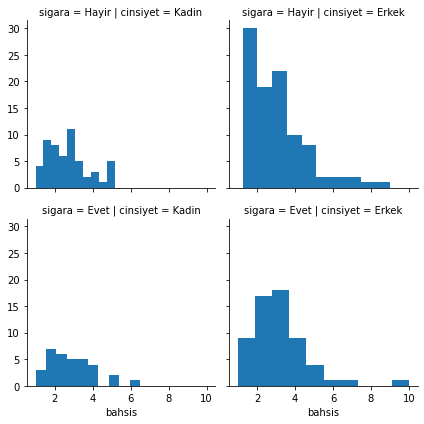

In [15]:
bahsis_facet2 = sns.FacetGrid(bahsis_data,row='sigara',col='cinsiyet')

bahsis_facet2.map(plt.hist,'bahsis')

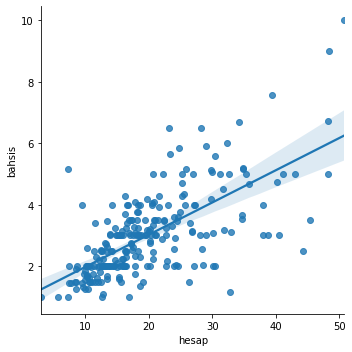

In [16]:
sns.lmplot(x='hesap',y='bahsis',data=bahsis_data)

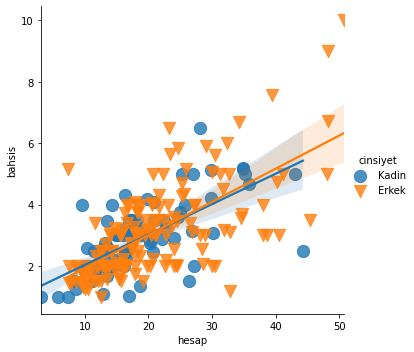

In [17]:
sns.lmplot(x='hesap',y='bahsis',data=bahsis_data,hue='cinsiyet',
           markers=['o','v'],scatter_kws={'s':150})

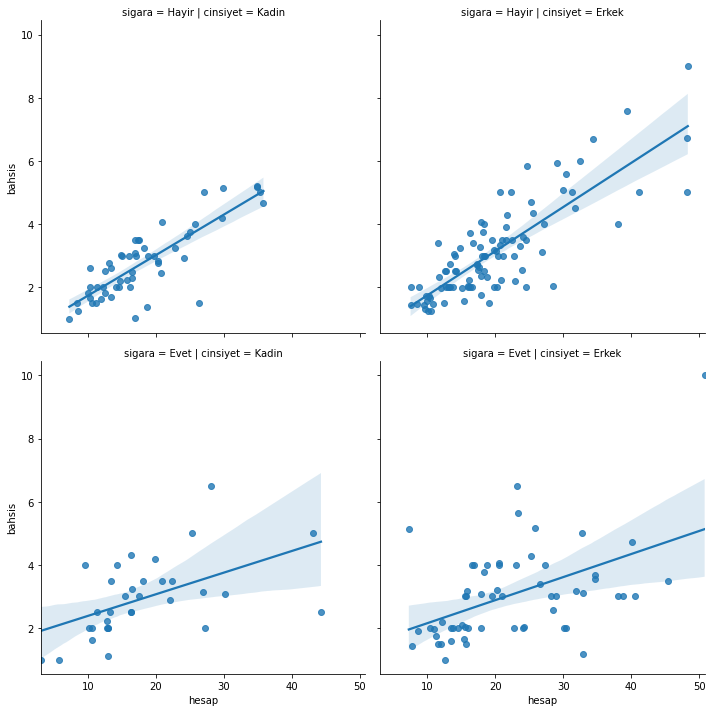

In [18]:
sns.lmplot(x='hesap',y='bahsis',data=bahsis_data,row='sigara',col='cinsiyet')